# **Implementación**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

mat_data = scipy.io.loadmat('data.mat')

x = mat_data['data'][0][0][0][0]
r = mat_data['data'][0][0][1][0]
s = mat_data['data'][0][0][1][1]

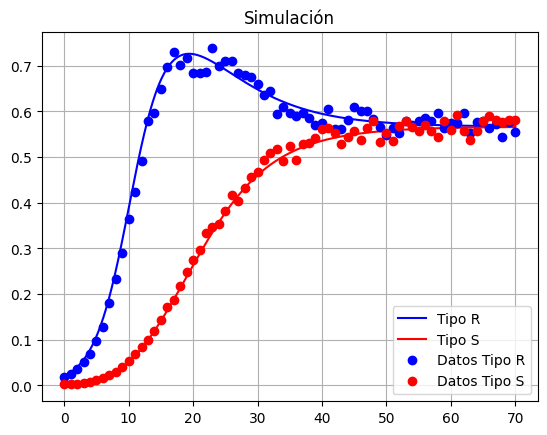

In [27]:
def f(t, u):
    s, r = u
    rs = 0.36
    ks = 0.85
    gammas = 0.5
    rr = 0.36
    gammar = 0.5
    kr = 0.85
    dxdt = rs*s*(1-(s/ks)-(gammar*r/ks))
    dydt = rr*r*(1-(r/kr)-(gammas*s/kr))
    return np.array([dxdt, dydt])

def runge_kutta4(u0, a, b, n):
    t = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    u = np.zeros((n, 2))
    u[0] = u0

    for i in range(1, n):
        k1 = h * f(t[i - 1], u[i - 1])
        k2 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k1)
        k3 = h * f(t[i - 1] + 0.5 * h, u[i - 1] + 0.5 * k2)
        k4 = h * f(t[i - 1] + h, u[i - 1] + k3)
        u[i] = u[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t, u

u0 = np.array([0.02, 0.002])
a = 0
b = 70
n = 1000

t, u = runge_kutta4(u0, a, b, n)

plt.plot(t, u[:,0], '-b',label='Tipo R')
plt.plot(t, u[:,1], '-r', label='Tipo S')
plt.title('Simulación')
plt.plot(x,r,'ob', label = 'Datos Tipo R')
plt.plot(x,s,'or', label = 'Datos Tipo S')
plt.legend()
plt.grid()
plt.show()

